<a href="https://colab.research.google.com/github/missattack/RedesComplexas/blob/main/ModeloSIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# promt
# Faça um modelo de agentes em python para S, I e R, onde:

#  S(t): Número de indivíduos susceptíveis no tempo t.
#  I(t): Número de indivíduos infectados no tempo t.
#  R(t): Número de indivíduos recuperados no tempo t.
#  N=S+I+R: População total (assumida constante).
#  beta: Taxa de transmissão da infecção por unidade de tempo.
#  gama: Taxa de recuperação dos infectados por unidade de tempo.
#  𝑅_0 = beta/gama : Número básico de reprodução, que indica o número
#  médio de novas infecções causadas por um indivíduo infectado em uma
#  população completamente suscetível.

#  Para dados beta e gama, faça um gráfico de S, I e R contra o tempo.


import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
N = 1000  # População total
beta = 0.7  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
R0 = 0  # Número inicial de recuperados
Rn = beta/gamma # 'R naught', reproduction number in models like SIR.

t_max = 160  # Tempo máximo de simulação

# Inicialização dos arrays
S = np.zeros(t_max)
I = np.zeros(t_max)
R = np.zeros(t_max)

# Condições iniciais
S[0] = S0
I[0] = I0
R[0] = R0

# Simulação baseada no modelo SIR discreto
for t in range(1, t_max):
    new_infected = beta * S[t-1] * I[t-1] / N
    new_recovered = gamma * I[t-1]

    S[t] = S[t-1] - new_infected
    I[t] = I[t-1] + new_infected - new_recovered
    R[t] = R[t-1] + new_recovered



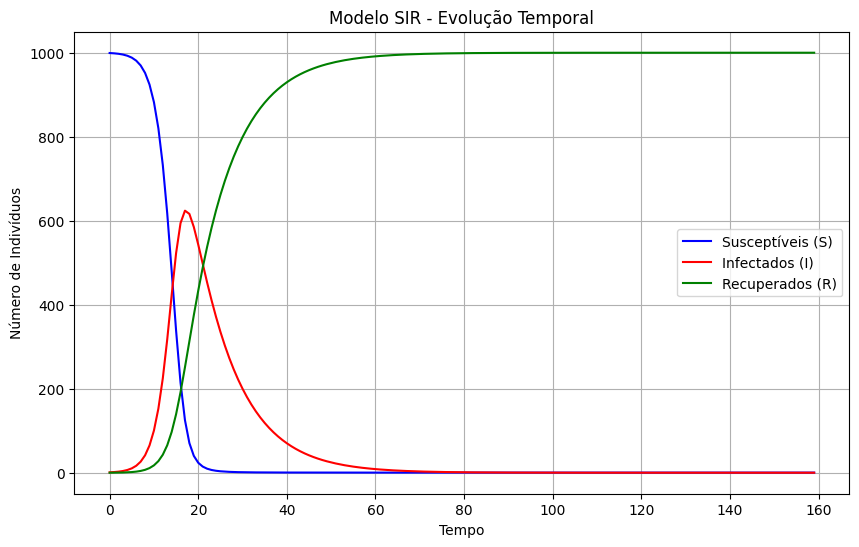

In [2]:
# Gráfico da evolução de S, I e R
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptíveis (S)', color='blue')
plt.plot(I, label='Infectados (I)', color='red')
plt.plot(R, label='Recuperados (R)', color='green')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo SIR - Evolução Temporal')
plt.legend()
plt.grid()
plt.show()

In [3]:
# prompt
#  Quero um modelo estocástico.
#  Isso significa que um infectado pode passar a daoença para frente com certa
#  probabilidade.
#  Essa probabilidade é Rn (Rn = beta/gamma # 'R naught',
#  reproduction number in models like SIR).

# Parâmetros do modelo
N = 1000  # Número total de indivíduos
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Restante da população suscetível
R0 = 0  # Inicialmente, ninguém está recuperado

beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
Rn = beta / gamma  # Número de reprodução básico

T = 160  # Número de dias simulados

# Inicialização das populações
S, I, R = [S0], [I0], [R0]

# Simulação estocástica usando Monte Carlo
for t in range(T):
    new_infections = 0
    new_recoveries = 0

    for _ in range(I[-1]):  # Para cada infectado
        if S[-1] > 0 and np.random.rand() < beta * (S[-1] / N):  # Probabilidade de infectar
            new_infections += 1

        if np.random.rand() < gamma:  # Probabilidade de recuperação
            new_recoveries += 1

    # Atualiza os estados
    S.append(S[-1] - new_infections)
    I.append(I[-1] + new_infections - new_recoveries)
    R.append(R[-1] + new_recoveries)



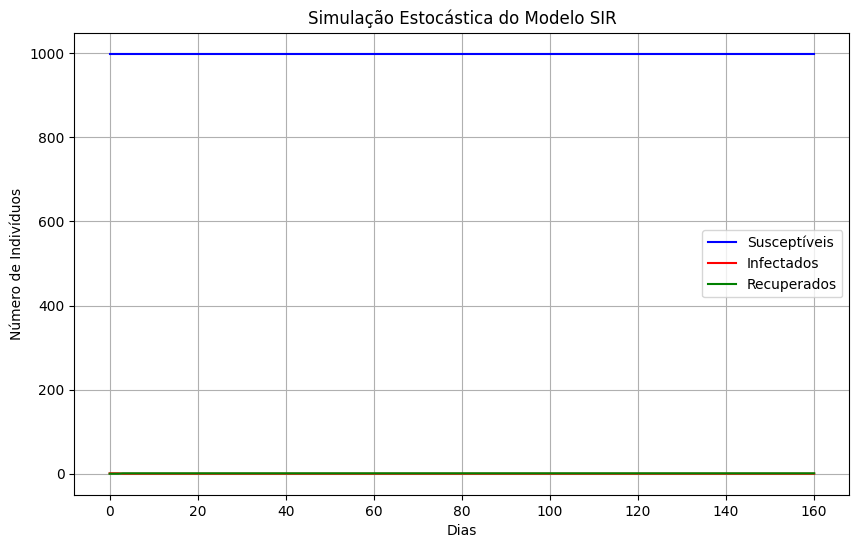

In [4]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(S, label="Susceptíveis", color="blue")
plt.plot(I, label="Infectados", color="red")
plt.plot(R, label="Recuperados", color="green")
plt.xlabel("Dias")
plt.ylabel("Número de Indivíduos")
plt.title("Simulação Estocástica do Modelo SIR")
plt.legend()
plt.grid()
plt.show()

In [5]:
# promt
# **"Develop a stochastic SIR model for disease transmission.
# Instead of deterministic transitions, implement probabilistic
# infection dynamics.
# Each infected individual should have a certain probability of
# transmitting the disease.

# This probability is given by the basic reproduction number Rn = beta/gamma
# ​onde  beta : transmission rate and gamma : recovery rate.

# The model should simulate individual interactions in a population,
# incorporating randomness in infection spread.
# Use Monte Carlo methods or agent-based modeling to capture stochastic effects.
# Output should include visualizations of infection curves over
# multiple simulations."**

# --o que o programa faz?
# I have updated your model to incorporate stochastic dynamics using Monte Carlo
# methods. The infection and recovery processes are now probabilistic,
# and the model runs multiple simulations to capture stochastic effects.
# The output visualizes the mean infection curves over 100 simulations.
# Let me know if you need further modifications!


# Parâmetros do modelo
N = 1000  # População total
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
R0 = 0  # Número inicial de recuperados

t_max = 160  # Tempo máximo de simulação
simulations = 100  # Número de simulações

# Configuração das simulações
S_results = np.zeros((simulations, t_max))
I_results = np.zeros((simulations, t_max))
R_results = np.zeros((simulations, t_max))

for sim in range(simulations):
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)

    S[0] = S0
    I[0] = I0
    R[0] = R0

    for t in range(1, t_max):
        new_infected = np.sum(np.random.rand(int(I[t-1])) < beta * S[t-1] / N)
        new_recovered = np.sum(np.random.rand(int(I[t-1])) < gamma)

        S[t] = max(S[t-1] - new_infected, 0)
        I[t] = max(I[t-1] + new_infected - new_recovered, 0)
        R[t] = min(R[t-1] + new_recovered, N)

    S_results[sim, :] = S
    I_results[sim, :] = I
    R_results[sim, :] = R


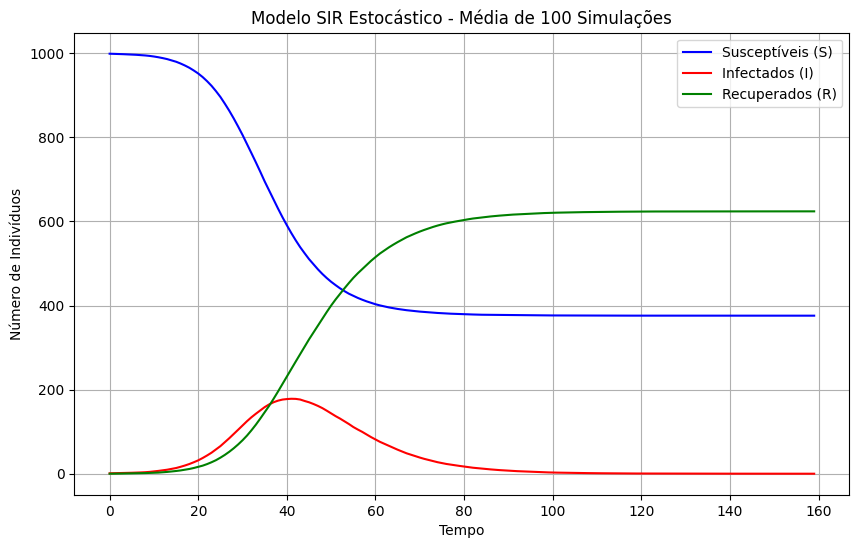

In [6]:
# Média das simulações
S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
R_mean = np.mean(R_results, axis=0)

# Gráfico da evolução de S, I e R
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.plot(I_mean, label='Infectados (I)', color='red')
plt.plot(R_mean, label='Recuperados (R)', color='green')
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo SIR Estocástico - Média de 100 Simulações')
plt.legend()
plt.grid()
plt.show()

In [7]:
# promt
# Mantenha as funcionalidades anteriores.
# Mas acrescente o desvio padrão das variáveis no gráfico
# das variáveis em função do tempo.

# o que o programa faz?
# Agora o gráfico inclui faixas de desvio padrão para cada
# variável (S, I e R) ao longo do tempo, representadas como áreas
# sombreadas ao redor das médias. Isso fornece uma melhor visualização
# da variabilidade das simulações estocásticas. Me avise se precisar
# de mais ajustes!

# Parâmetros do modelo
N = 1000  # População total
beta = 0.6  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
R0 = 0  # Número inicial de recuperados

t_max = 160  # Tempo máximo de simulação
simulations = 10  # Número de simulações

# Configuração das simulações
S_results = np.zeros((simulations, t_max))
I_results = np.zeros((simulations, t_max))
R_results = np.zeros((simulations, t_max))

for sim in range(simulations):
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)

    S[0] = S0
    I[0] = I0
    R[0] = R0

    for t in range(1, t_max):
        new_infected = np.sum(np.random.rand(int(I[t-1])) < beta * S[t-1] / N)
        new_recovered = np.sum(np.random.rand(int(I[t-1])) < gamma)

        S[t] = max(S[t-1] - new_infected, 0)
        I[t] = max(I[t-1] + new_infected - new_recovered, 0)
        R[t] = min(R[t-1] + new_recovered, N)

    S_results[sim, :] = S
    I_results[sim, :] = I
    R_results[sim, :] = R



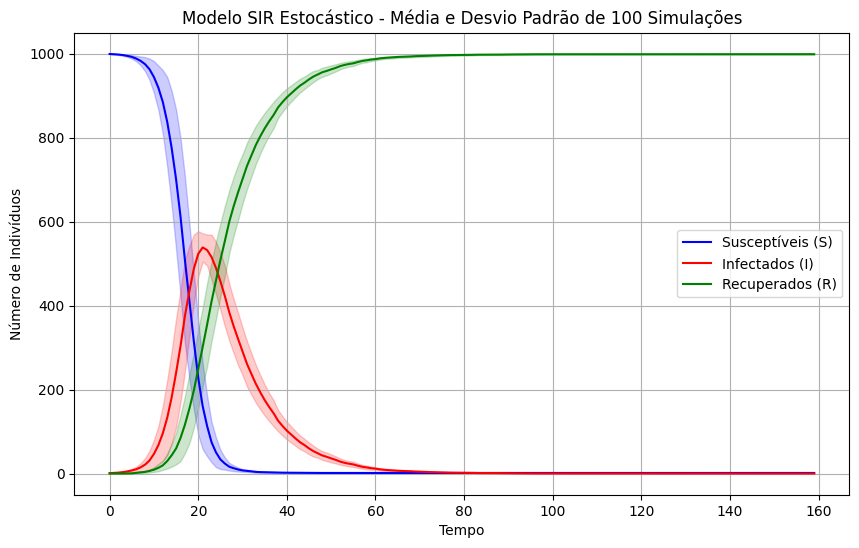

In [8]:
# Média e desvio padrão das simulações
S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
R_mean = np.mean(R_results, axis=0)

S_std = np.std(S_results, axis=0)
I_std = np.std(I_results, axis=0)
R_std = np.std(R_results, axis=0)

# Gráfico da evolução de S, I e R com desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.fill_between(range(t_max), S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2)

plt.plot(I_mean, label='Infectados (I)', color='red')
plt.fill_between(range(t_max), I_mean - I_std, I_mean + I_std, color='red', alpha=0.2)

plt.plot(R_mean, label='Recuperados (R)', color='green')
plt.fill_between(range(t_max), R_mean - R_std, R_mean + R_std, color='green', alpha=0.2)

plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo SIR Estocástico - Média e Desvio Padrão de 100 Simulações')
plt.legend()
plt.grid()
plt.show()

In [9]:
# promt
# Faça um modelo SIS, estocástico, com barras de erro.
# Além do plote com a evolução temporal das variáveis S, R e I (para
# um conjunto de valores dos parâmetros), faça também um diagrama de
# fase para a variável infectados (para tempo longo) em função do
# parâmetro beta, mostrando a fase absorvente e a fase ativa.

# o que o programa faz?
# O código agora implementa um modelo SIS estocástico, incluindo gráficos
# da evolução temporal das variáveis com barras de erro e um diagrama de
# fase da variável de infectados em função de β, evidenciando a transição
# entre a fase absorvente e a fase ativa. Me avise se precisar de
# ajustes adicionais!

# Parâmetros do modelo
N = 1000  # População total
beta_values = np.linspace(0.0, 1.0, 20)  # Variação da taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis

t_max = 160  # Tempo máximo de simulação
simulations = 100  # Número de simulações

# Configuração das simulações
I_equilibrium = []


In [10]:
for beta in beta_values:
    S_results = np.zeros((simulations, t_max))
    I_results = np.zeros((simulations, t_max))

    for sim in range(simulations):
        S = np.zeros(t_max)
        I = np.zeros(t_max)

        S[0] = S0
        I[0] = I0

        for t in range(1, t_max):
            new_infected = np.sum(np.random.rand(int(I[t-1])) < beta * S[t-1] / N)
            new_recovered = np.sum(np.random.rand(int(I[t-1])) < gamma)

            S[t] = max(S[t-1] - new_infected, 0)
            I[t] = max(I[t-1] + new_infected - new_recovered, 0)

        S_results[sim, :] = S
        I_results[sim, :] = I

    I_mean_final = np.mean(I_results[:, -1])
    I_equilibrium.append(I_mean_final)



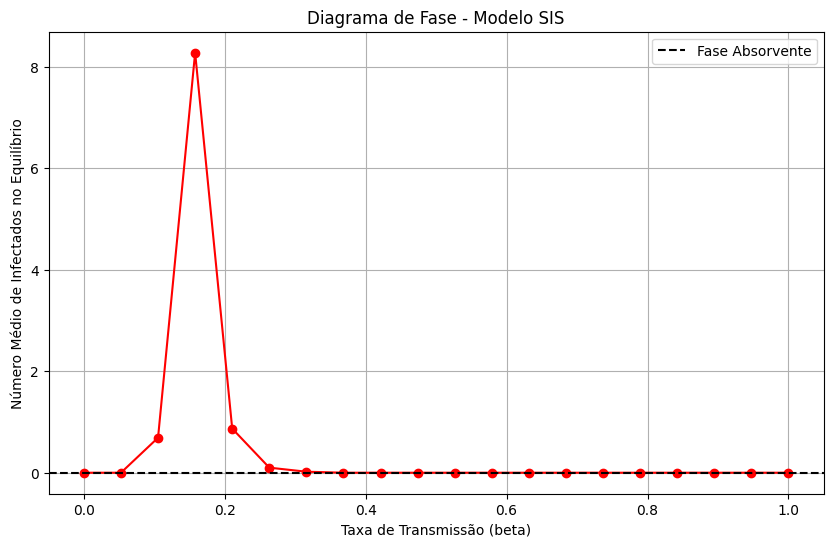

In [11]:
# Gráfico do diagrama de fase
plt.figure(figsize=(10, 6))
plt.plot(beta_values, I_equilibrium, marker='o', linestyle='-', color='red')
plt.axhline(y=0, color='black', linestyle='--', label='Fase Absorvente')
plt.xlabel('Taxa de Transmissão (beta)')
plt.ylabel('Número Médio de Infectados no Equilíbrio')
plt.title('Diagrama de Fase - Modelo SIS')
plt.legend()
plt.grid()
plt.show()



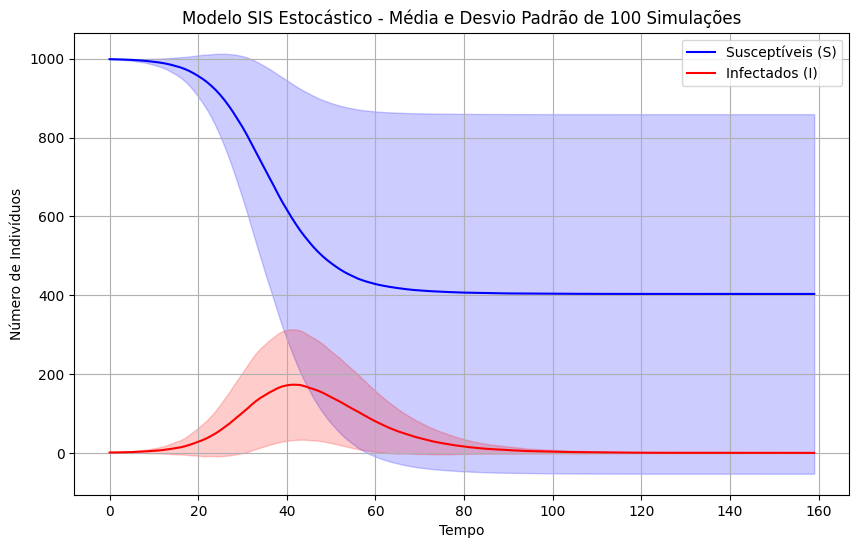

In [12]:
# Média e desvio padrão das simulações para um beta fixo
beta_fixed = 0.3  # Valor fixo de beta para análise temporal
S_results = np.zeros((simulations, t_max))
I_results = np.zeros((simulations, t_max))

for sim in range(simulations):
    S = np.zeros(t_max)
    I = np.zeros(t_max)

    S[0] = S0
    I[0] = I0

    for t in range(1, t_max):
        new_infected = np.sum(np.random.rand(int(I[t-1])) < beta_fixed * S[t-1] / N)
        new_recovered = np.sum(np.random.rand(int(I[t-1])) < gamma)

        S[t] = max(S[t-1] - new_infected, 0)
        I[t] = max(I[t-1] + new_infected - new_recovered, 0)

    S_results[sim, :] = S
    I_results[sim, :] = I

S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
S_std = np.std(S_results, axis=0)
I_std = np.std(I_results, axis=0)

# Gráfico da evolução de S e I com desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.fill_between(range(t_max), S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2)
plt.plot(I_mean, label='Infectados (I)', color='red')
plt.fill_between(range(t_max), I_mean - I_std, I_mean + I_std, color='red', alpha=0.2)
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title('Modelo SIS Estocástico - Média e Desvio Padrão de 100 Simulações')
plt.legend()
plt.grid()
plt.show()

In [13]:
# prompt
# Para o programa do modelo SIR (o último que você gerou), coloque os
# agentes em uma rede, de forma que a interação, e portanto a infecção,
# apenas se faça pelos contatos possíveis nessa rede.
# Quero simular 3 tipos de rede, controlando apenas escolhendo a
# função adequada para gerar a rede, todo o resto ficando igual.
# As quedes que quero são as seguintes:  Erdős-Rényi, Watts-Strogatz e
# Barabási-Albert. Coloque todos os parâmetros no início.

# o que o programa faz?
# Agora o modelo SIR estocástico está implementado em uma rede,
# permitindo a simulação da propagação da infecção apenas pelos contatos
# definidos na estrutura da rede. Você pode escolher entre os três
# tipos de rede (Erdős-Rényi, Watts-Strogatz e Barabási-Albert)
# alterando o parâmetro tipo_rede. Os gráficos incluem tanto a
# evolução temporal das variáveis quanto o diagrama de fase para a
# fração de infectados em equilíbrio. Me avise se precisar de
# ajustes adicionais!

import networkx as nx

# Parâmetros do modelo
N = 1000  # População total
beta_values = np.linspace(0.1, 1.0, 20)  # Variação da taxa de transmissão
gamma = 0.1  # Taxa de recuperação
I0 = 1  # Número inicial de infectados
S0 = N - I0  # Número inicial de suscetíveis
t_max = 20  # Tempo máximo de simulação
simulations = 10  # Número de simulações
tipo_rede = "erdos_renyi"  # Escolha entre "erdos_renyi", "watts_strogatz", "barabasi_albert"

# Gerar rede conforme o tipo escolhido
if tipo_rede == "erdos_renyi":
    G = nx.erdos_renyi_graph(N, 0.01)  # Probabilidade de conexão 0.01
elif tipo_rede == "watts_strogatz":
    G = nx.watts_strogatz_graph(N, k=6, p=0.1)  # Cada nó conectado a 6 vizinhos com probabilidade de reconexão 0.1
elif tipo_rede == "barabasi_albert":
    G = nx.barabasi_albert_graph(N, m=3)  # Modelo de crescimento preferencial
else:
    raise ValueError("Tipo de rede inválido")

# Configuração das simulações
I_equilibrium = []




In [14]:
for beta in beta_values:
    S_results = np.zeros((simulations, t_max))
    I_results = np.zeros((simulations, t_max))

    for sim in range(simulations):
        states = {node: "S" for node in G.nodes()}
        infected_nodes = np.random.choice(list(G.nodes()), I0, replace=False)
        for node in infected_nodes:
            states[node] = "I"

        S = np.zeros(t_max)
        I = np.zeros(t_max)
        S[0] = S0
        I[0] = I0

        for t in range(1, t_max):
            new_states = states.copy()
            for node in G.nodes():
                if states[node] == "S":
                    infected_neighbors = sum(1 for neighbor in G.neighbors(node) if states[neighbor] == "I")
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_states[node] = "I"
                elif states[node] == "I":
                    if np.random.rand() < gamma:
                        new_states[node] = "S"

            states = new_states.copy()
            S[t] = sum(1 for state in states.values() if state == "S")
            I[t] = sum(1 for state in states.values() if state == "I")

        S_results[sim, :] = S
        I_results[sim, :] = I

    I_mean_final = np.mean(I_results[:, -1])
    I_equilibrium.append(I_mean_final)



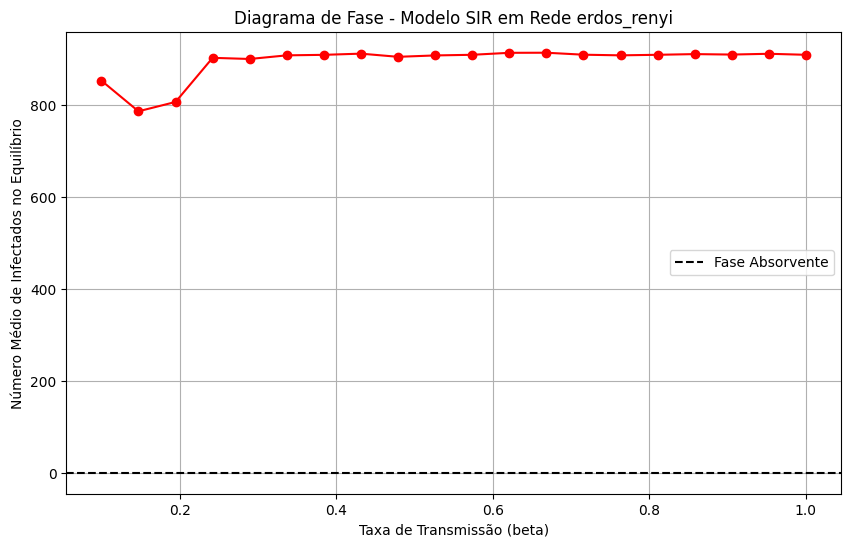

In [15]:
# Gráfico do diagrama de fase
plt.figure(figsize=(10, 6))
plt.plot(beta_values, I_equilibrium, marker='o', linestyle='-', color='red')
plt.axhline(y=0, color='black', linestyle='--', label='Fase Absorvente')
plt.xlabel('Taxa de Transmissão (beta)')
plt.ylabel('Número Médio de Infectados no Equilíbrio')
plt.title(f'Diagrama de Fase - Modelo SIR em Rede {tipo_rede}')
plt.legend()
plt.grid()
plt.show()



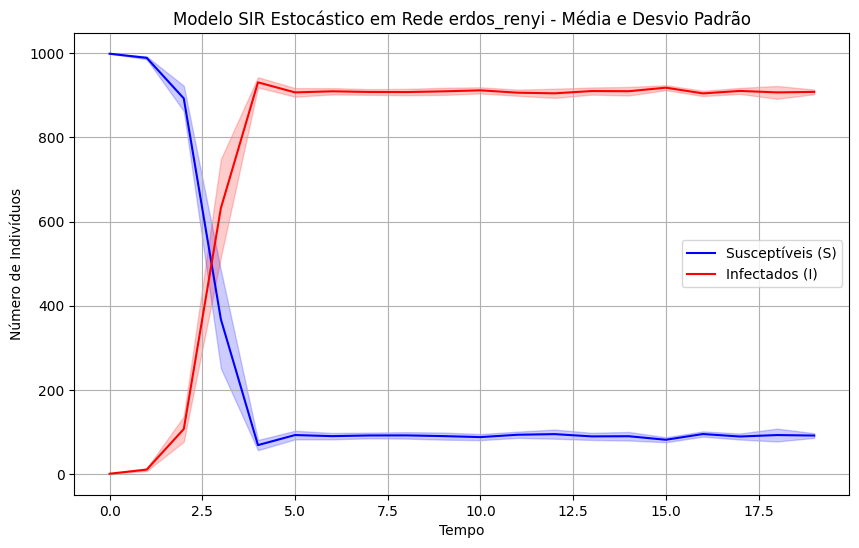

In [16]:
# Média e desvio padrão das simulações para um beta fixo
beta_fixed = 0.3  # Valor fixo de beta para análise temporal
S_mean = np.mean(S_results, axis=0)
I_mean = np.mean(I_results, axis=0)
S_std = np.std(S_results, axis=0)
I_std = np.std(I_results, axis=0)

# Gráfico da evolução de S e I com desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(S_mean, label='Susceptíveis (S)', color='blue')
plt.fill_between(range(t_max), S_mean - S_std, S_mean + S_std, color='blue', alpha=0.2)
plt.plot(I_mean, label='Infectados (I)', color='red')
plt.fill_between(range(t_max), I_mean - I_std, I_mean + I_std, color='red', alpha=0.2)
plt.xlabel('Tempo')
plt.ylabel('Número de Indivíduos')
plt.title(f'Modelo SIR Estocástico em Rede {tipo_rede} - Média e Desvio Padrão')
plt.legend()
plt.grid()
plt.show()